In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split , KFold
from sklearn.base import clone
from scipy import stats
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [51]:
df=pd.read_csv('loan_approval_dataset.csv')


In [52]:
df.isnull().sum()


loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
 commercial_assets_value    0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [53]:
df['loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

In [54]:
df.drop(['loan_id'], axis=1, inplace=True)

# Encode categorical variable using one-hot encoding
onehot_encoded = pd.get_dummies(df['education'], prefix='education')
df = pd.concat([df, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(df['self_employed'], prefix='self_employed')
df = pd.concat([df, onehot_encoded], axis=1)
df.drop(['education', 'self_employed'], axis=1, inplace=True)
target_col = df.pop('loan_status')
df['loan_status'] = target_col  # Add the target column at the last position
# Mapping values to 1 and 0
status_mapping = {' Approved': 1, ' Rejected': 0}
df['loan_status'] = df['loan_status'].map(status_mapping)

In [55]:
df.columns


Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', ' commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_ Graduate',
       'education_ Not Graduate', 'self_employed_ No', 'self_employed_ Yes',
       'loan_status'],
      dtype='object')

<ipython-input-56-a663cb55db1b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[i])
<ipython-input-56-a663cb55db1b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[i])
<ipython-input-56-a663cb55db1b>:8: UserWarning: 

`distplot` is a deprecated function 

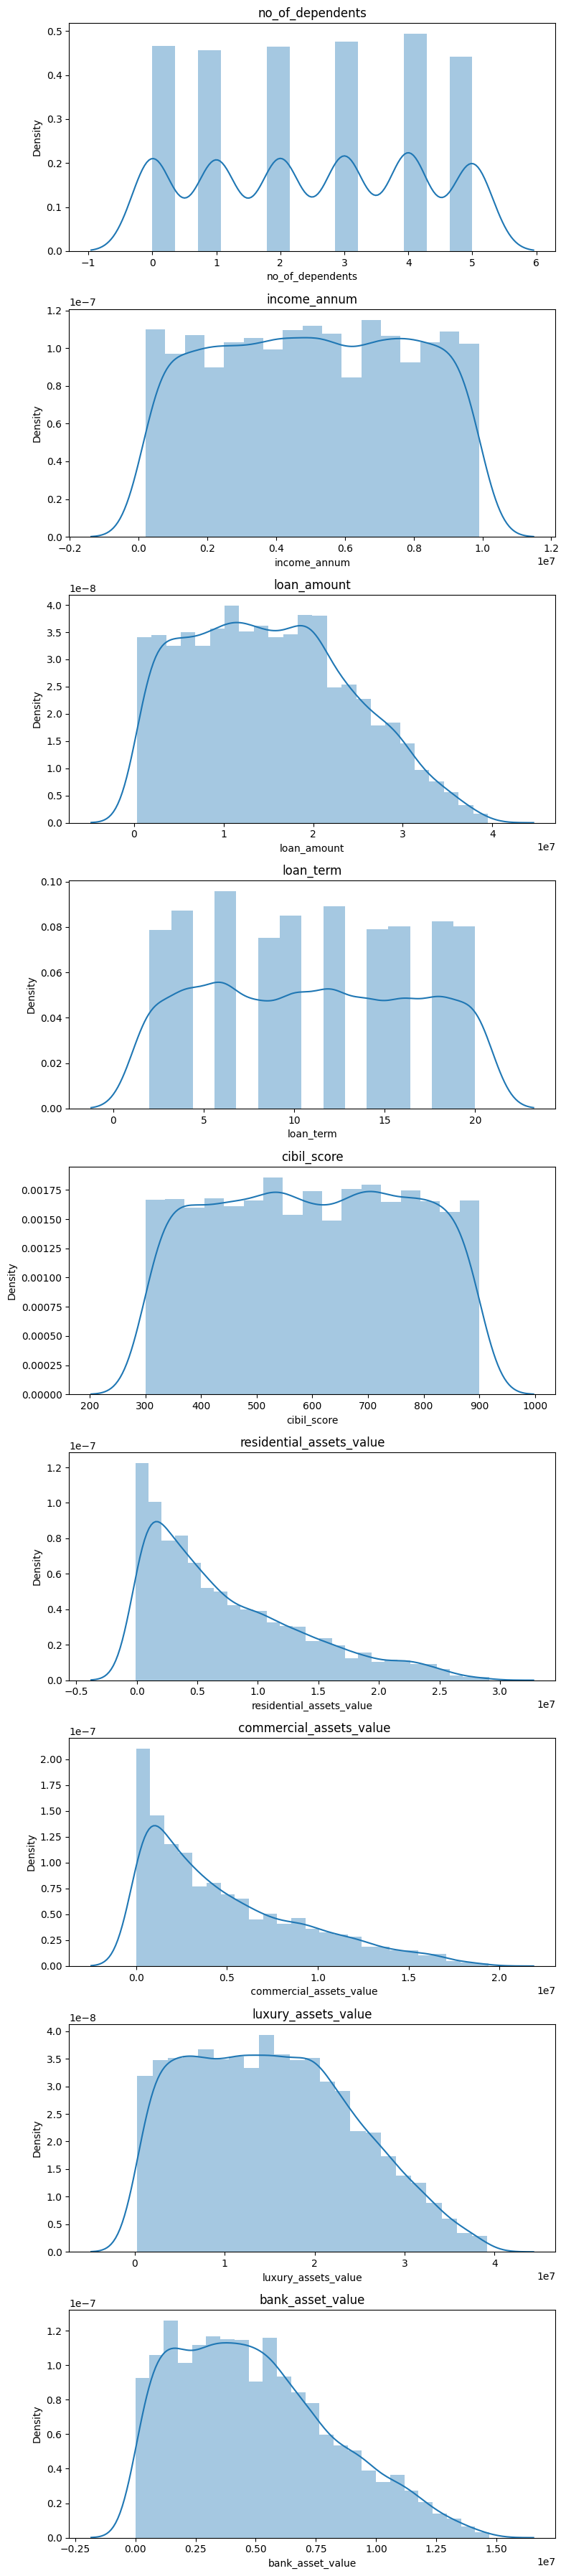

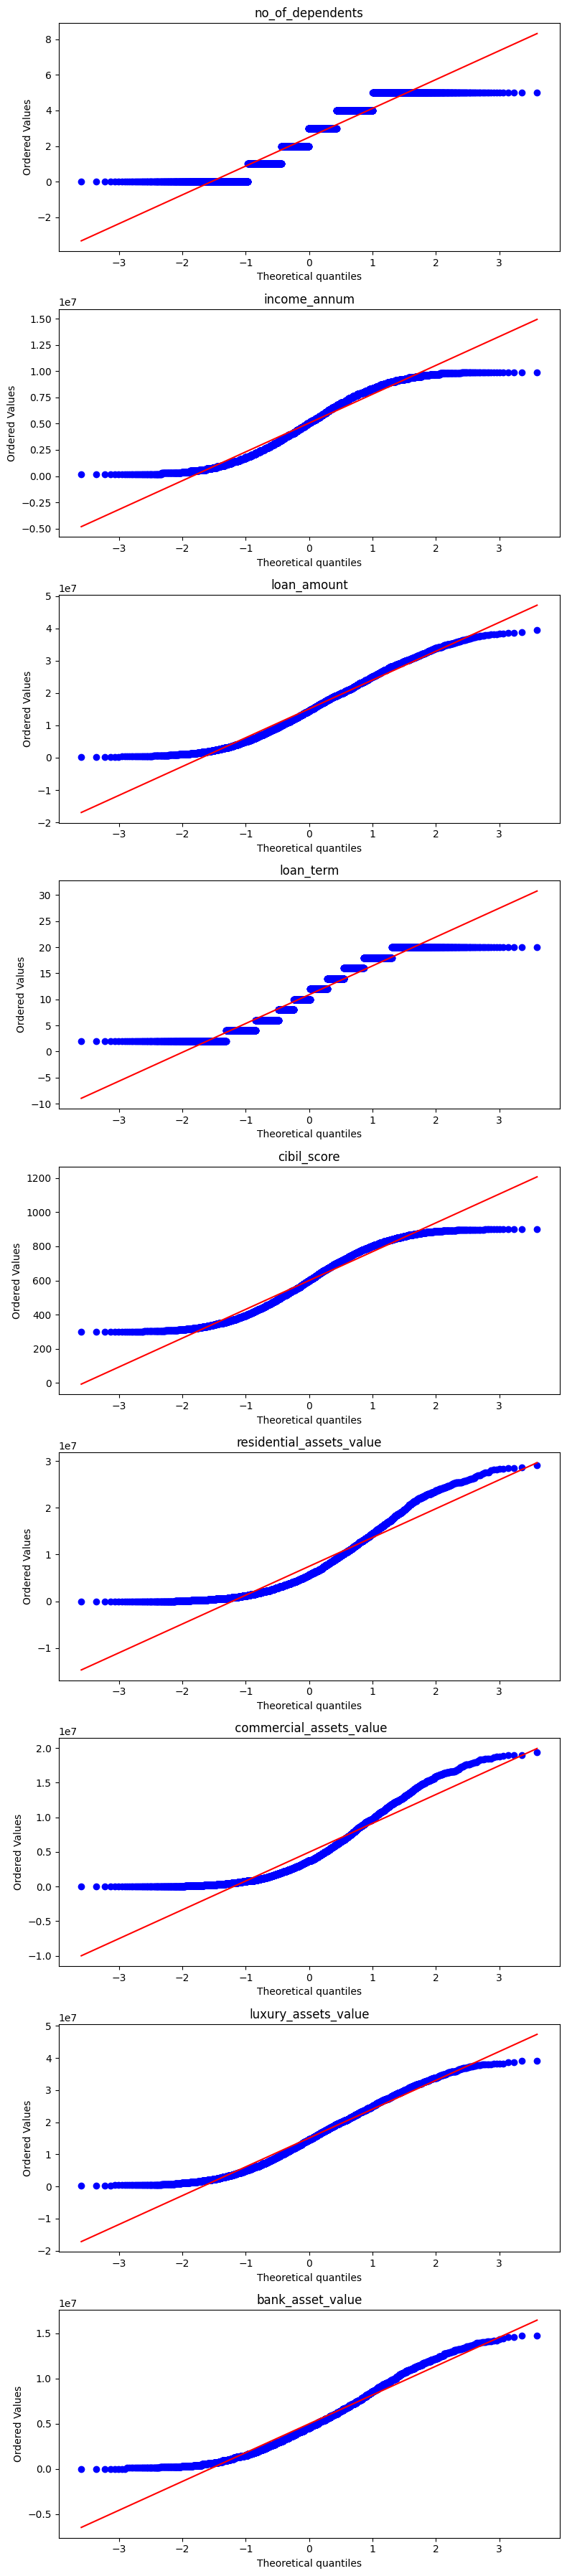

In [56]:
l1=['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', ' commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']


fig, axes = plt.subplots(len(l1), 1, figsize=(8, len(l1)*4))
for i, column in enumerate(l1):
    sns.distplot(df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(l1), 1, figsize=(8, len(l1)*4))
for i, column in enumerate(l1):
    stats.probplot(df[column], plot=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


In [57]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
# Split the data into training and testing set
X1, X_test, y1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [94]:
k = 10
max_depth = 20
kf = KFold(n_splits=k, shuffle=True, random_state=42)

best_accuracy = 0
best_model_dt = None

for train_index, val_index in kf.split(X1):
    X_train_fold, X_val_fold = X1[train_index], X1[val_index]
    y_train_fold, y_val_fold = y1[train_index], y1[val_index]

    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train_fold, y_train_fold)

    y_pred = dt.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred)

    # Check if current model has higher accuracy than the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_dt = dt

# Fit the best model on the full training data
#best_model.fit(X1, y1)

# Make predictions on the validation set
y_pred_test = best_model_dt.predict(X_test)

# Calculate accuracy and F1 score on the validation set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Best Model's Validation Accuracy:", best_accuracy)
print("Accuracy on test Set:", accuracy_test)
print("F1 Score on test Set:", f1_test)


Best Model's Validation Accuracy: 0.9882697947214076
Accuracy on test Set: 0.9824355971896955
F1 Score on test Set: 0.9859943977591035


In [95]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
best_accuracy = 0
best_model_rf = None

for train_index, val_index in kf.split(X1):
    X_train_fold, X_val_fold = X1[train_index], X1[val_index]
    y_train_fold, y_val_fold = y1[train_index], y1[val_index]

    rf = RandomForestClassifier(n_estimators=200)
    rf.fit(X_train_fold, y_train_fold)

    y_pred = rf.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred)

    # Check if current model has higher accuracy than the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_rf = rf

# Fit the best model on the full training data
#best_model.fit(X1, y1)

# Make predictions on the validation set
y_pred_test = best_model_rf.predict(X_test)

# Calculate accuracy and F1 score on the validation set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Best Model's Validation Accuracy:", best_accuracy)
print("Accuracy on test Set:", accuracy_test)
print("F1 Score on test Set:", f1_test)


Best Model's Validation Accuracy: 0.9883040935672515
Accuracy on test Set: 0.9754098360655737
F1 Score on test Set: 0.9805375347544021


In [96]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
best_accuracy = 0
best_model_xgb = None

for train_index, val_index in kf.split(X1):
    X_train_fold, X_val_fold = X1[train_index], X1[val_index]
    y_train_fold, y_val_fold = y1[train_index], y1[val_index]

    xgb = XGBClassifier(n_estimators=200)
    xgb.fit(X_train_fold, y_train_fold)

    y_pred = xgb.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred)

    # Check if current model has higher accuracy than the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_xgb = xgb

# Fit the best model on the full training data
#best_model.fit(X1, y1)

# Make predictions on the validation set
y_pred_test = best_model_xgb.predict(X_test)

# Calculate accuracy and F1 score on the validation set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Best Model's Validation Accuracy:", best_accuracy)
print("Accuracy on test Set:", accuracy_test)
print("F1 Score on test Set:", f1_test)



Best Model's Validation Accuracy: 0.9883040935672515
Accuracy on test Set: 0.9812646370023419
F1 Score on test Set: 0.9851576994434138


In [97]:
from sklearn.ensemble import AdaBoostClassifier
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
best_accuracy = 0
best_model_adb = None

for train_index, val_index in kf.split(X1):
    X_train_fold, X_val_fold = X1[train_index], X1[val_index]
    y_train_fold, y_val_fold = y1[train_index], y1[val_index]

    adb= AdaBoostClassifier(n_estimators=150)
    adb.fit(X_train_fold, y_train_fold)

    y_pred = adb.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred)

    # Check if current model has higher accuracy than the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_adb = adb

# Fit the best model on the full training data
#best_model.fit(X1, y1)

# Make predictions on the validation set
y_pred_test = best_model_adb.predict(X_test)

# Calculate accuracy and F1 score on the validation set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Best Model's Validation Accuracy:", best_accuracy)
print("Accuracy on test Set:", accuracy_test)
print("F1 Score on test Set:", f1_test)


Best Model's Validation Accuracy: 0.9883040935672515
Accuracy on test Set: 0.977751756440281
F1 Score on test Set: 0.9822926374650514


In [98]:
from sklearn.ensemble import GradientBoostingClassifier
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
best_accuracy = 0
best_model_gb = None

for train_index, val_index in kf.split(X1):
    X_train_fold, X_val_fold = X1[train_index], X1[val_index]
    y_train_fold, y_val_fold = y1[train_index], y1[val_index]

    gb= GradientBoostingClassifier(n_estimators=200)
    gb.fit(X_train_fold, y_train_fold)

    y_pred = gb.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred)

    # Check if current model has higher accuracy than the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_gb = gb

# Fit the best model on the full training data
#best_model.fit(X1, y1)

# Make predictions on the validation set
y_pred_test = best_model_gb.predict(X_test)

# Calculate accuracy and F1 score on the validation set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Best Model's Validation Accuracy:", best_accuracy)
print("Accuracy on test Set:", accuracy_test)
print("F1 Score on test Set:", f1_test)



Best Model's Validation Accuracy: 0.9882697947214076
Accuracy on test Set: 0.9847775175644028
F1 Score on test Set: 0.987929433611885


In [99]:
from sklearn.ensemble import HistGradientBoostingClassifier
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
best_accuracy = 0
best_model_hist = None

for train_index, val_index in kf.split(X1):
    X_train_fold, X_val_fold = X1[train_index], X1[val_index]
    y_train_fold, y_val_fold = y1[train_index], y1[val_index]

    hist= HistGradientBoostingClassifier(max_iter=200)
    hist.fit(X_train_fold, y_train_fold)

    y_pred = hist.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred)

    # Check if current model has higher accuracy than the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_hist = hist

# Fit the best model on the full training data
#best_model.fit(X1, y1)

# Make predictions on the validation set
y_pred_test = best_model_hist.predict(X_test)

# Calculate accuracy and F1 score on the validation set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Best Model's Validation Accuracy:", best_accuracy)
print("Accuracy on test Set:", accuracy_test)
print("F1 Score on test Set:", f1_test)


Best Model's Validation Accuracy: 0.9912280701754386
Accuracy on test Set: 0.9859484777517564
F1 Score on test Set: 0.9888682745825603


In [101]:
from sklearn.base import clone
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# Ensemble of models
ensemble = [clone(best_model_xgb), clone(best_model_dt), clone(best_model_rf), clone(best_model_adb), clone(best_model_gb), clone(hist)]

# Train each model in the ensemble
for model in ensemble:
    model.fit(X1, y1)

# Make predictions using the ensemble
ensemble_pred = np.array([model.predict(X_test) for model in ensemble])
ensemble_pred_avg = np.mean(ensemble_pred, axis=0)

# Convert ensemble predictions to binary labels
ensemble_pred_labels = np.where(ensemble_pred_avg >= 0.5, 1, 0)

# Calculate the F1 score of the ensemble predictions
f1 = f1_score(y_test, ensemble_pred_labels)

# Calculate the accuracy of the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_pred_labels)

print("Ensemble F1 Score:", f1)
print("Ensemble Accuracy:", accuracy)


Ensemble F1 Score: 0.9870129870129871
Ensemble Accuracy: 0.9836065573770492
